In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

%matplotlib inline
plt.style.use("ggplot")


Load Fashion-MNIST into data/ folder

In [3]:
data_dir = "../data"

transform = transforms.ToTensor()  # converts PIL image to tensor in [0, 1]

train_dataset = datasets.FashionMNIST(
    root=data_dir,
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root=data_dir,
    train=False,
    download=True,
    transform=transform
)


In [4]:
len(train_dataset), len(test_dataset)


(60000, 10000)

Understand the data shape & labels

In [5]:
image, label = train_dataset[0]
print("Image shape:", image.shape)  # (1, 28, 28)
print("Label:", label)


Image shape: torch.Size([1, 28, 28])
Label: 9


Fashion-MNIST labels are 0–9. Let’s map them to human-readable class names:

In [6]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Label:", label, "->", class_names[label])


Label: 9 -> Ankle boot


Step 6 – Visualize a grid of sample images (EDA)

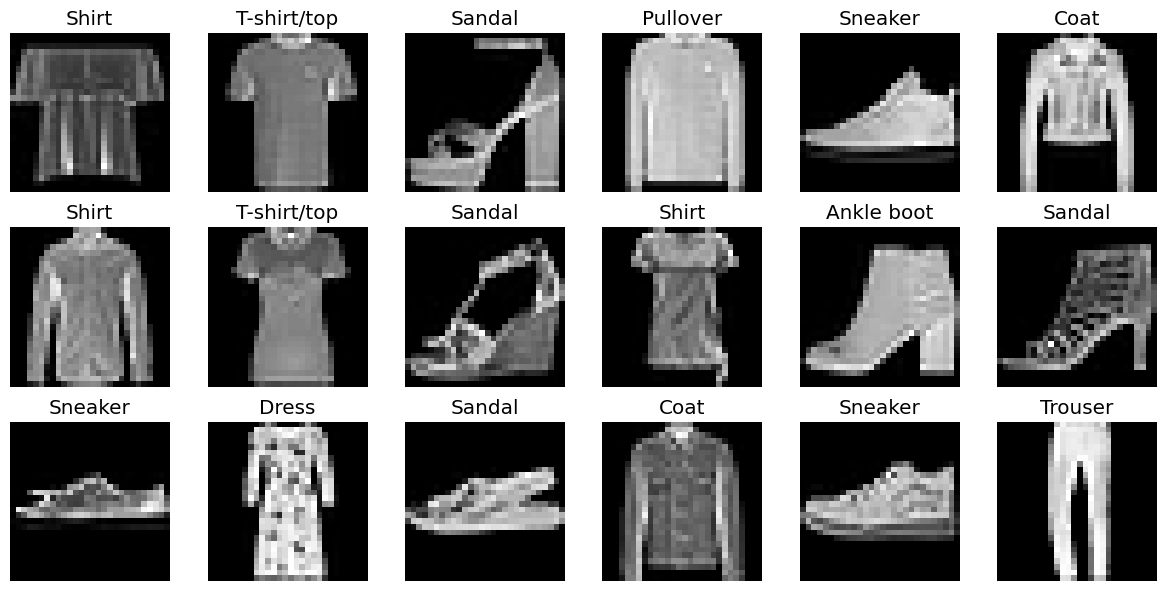

In [7]:
def show_examples(dataset, n_rows=3, n_cols=6):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    axes = axes.flatten()
    
    for ax in axes:
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        img = img.squeeze(0)  # (1, 28, 28) -> (28, 28)
        
        ax.imshow(img, cmap="gray")
        ax.set_title(class_names[label])
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

show_examples(train_dataset)


Prepare data for PCA (flat vectors)

In [8]:
# choose how many training samples to use for PCA (start smaller if needed)
n_samples = 10000

# take first n_samples
images = []
labels = []

for i in range(n_samples):
    img, label = train_dataset[i]
    img = img.squeeze(0)          # (1,28,28) -> (28,28)
    images.append(img.numpy().reshape(-1))  # flatten to (784,)
    labels.append(label)

X = np.stack(images, axis=0)  # shape: (n_samples, 784)
y = np.array(labels)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 784)
y shape: (10000,)


Center the data for PCA,, will be done automatically by sklearn later

In [9]:
X_mean = X.mean(axis=0)  # mean per pixel
print("Mean vector shape:", X_mean.shape)


Mean vector shape: (784,)


visualize the mean image

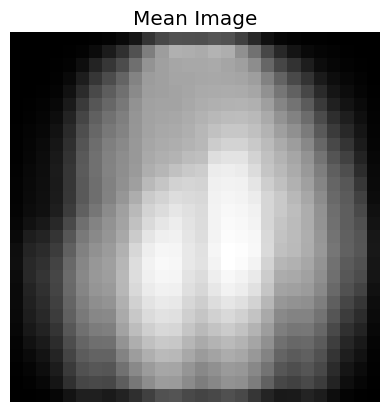

In [10]:
plt.imshow(X_mean.reshape(28, 28), cmap="gray")
plt.title("Mean Image")
plt.axis("off")
plt.show()
